In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales_train_evaluation.csv')
calendar = pd.read_csv('calendar.csv')
price = pd.read_csv('sell_prices.csv')


In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
sales = reduce_mem_usage(sales)
calendar = reduce_mem_usage(calendar)
price = reduce_mem_usage(price)

Memory usage of dataframe is 452.91 MB
Memory usage after optimization is: 96.30 MB
Decreased by 78.7%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.19 MB
Decreased by 8.7%
Memory usage of dataframe is 208.77 MB
Memory usage after optimization is: 45.76 MB
Decreased by 78.1%


In [5]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, price, on=['store_id','item_id','wm_yr_wk'], how='left')
display(df.head())
print(df.info())

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype   
---  ------        -----   
 0   id            category
 1   item_id       category
 2   dept_id       category
 3   cat_id        category
 4   store_id      category
 5   state_id      category
 6   d             object  
 7   sold          int16   
 8   date          category
 9   wm_yr_wk      int16   
 10  weekday       category
 11  wday          int8    
 12  month         int8    
 13  year          int16   
 14  event_name_1  category
 15  event_type_1  category
 16  event_name_2  category
 17  event_type_2  category
 18  snap_CA       int8    
 19  snap_TX       int8    
 20  snap_WI       int8    
 21  sell_price    float16 
dtypes: category(12), float16(1), int16(3), int8(5), object(1)
memory usage: 2.4+ GB
None


Red: price / Blue: Quantity sold
CA_1
Plotting for item HOBBIES_1_001, data length: 1941
Plotting for item HOBBIES_1_010, data length: 1941
Plotting for item HOBBIES_2_001, data length: 1941
Plotting for item HOBBIES_2_100, data length: 1941
Plotting for item HOUSEHOLD_1_001, data length: 1941
Plotting for item HOUSEHOLD_1_010, data length: 1941
Plotting for item HOUSEHOLD_2_001, data length: 1941
Plotting for item HOUSEHOLD_2_100, data length: 1941
Plotting for item FOODS_1_001, data length: 1941
Plotting for item FOODS_1_010, data length: 1941
Plotting for item FOODS_2_001, data length: 1941
Plotting for item FOODS_2_100, data length: 1941


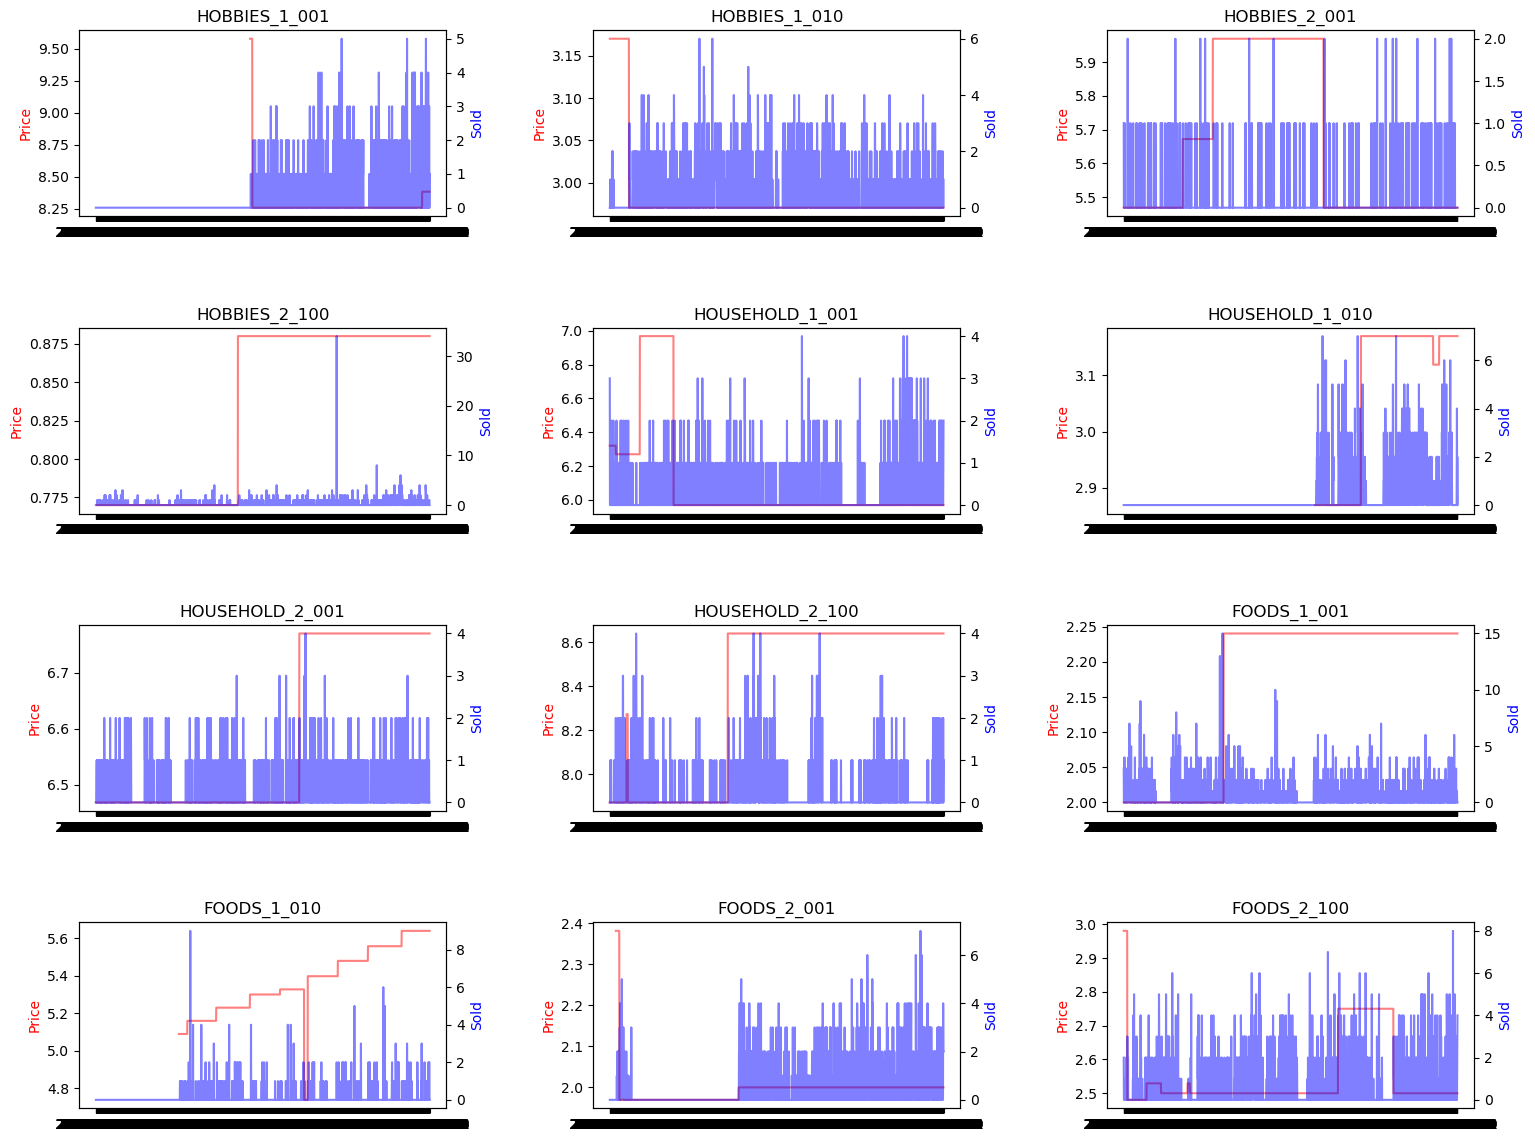

In [6]:
itemID = ['HOBBIES_1_001', 'HOBBIES_1_010', 'HOBBIES_2_001', 'HOBBIES_2_100',
          'HOUSEHOLD_1_001', 'HOUSEHOLD_1_010', 'HOUSEHOLD_2_001', 'HOUSEHOLD_2_100',
          'FOODS_1_001', 'FOODS_1_010', 'FOODS_2_001', 'FOODS_2_100']

print('Red: price / Blue: Quantity sold')
print('CA_1')

r, c = 0, 0
fig, axs = plt.subplots(4, 3, figsize=(18, 14),frameon=False)  # Adjusted figure size

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(0, 12):
    df_store = df[df['store_id'] == 'CA_1']
    item_df = df_store[df_store['item_id'] == itemID[i]]

    print(f"Plotting for item {itemID[i]}, data length: {len(item_df)}")  # Debugging print

    ax = axs[r, c]  # Accessing the current axis

    ax2 = ax.twinx()
    ax.plot(item_df['date'], item_df['sell_price'], color='r', alpha=0.5, label='Price')
    ax2.plot(item_df['date'], item_df['sold'], color='b', alpha=0.5, label='Sold')
    ax.set_title(itemID[i])

    # Adding labels to each axis for clarity
    ax.set_ylabel('Price', color='r')
    ax2.set_ylabel('Sold', color='b')

    c += 1
    if c == 3:
        c = 0
        r += 1

plt.show()

Red: price / Blue: Quantity sold

CA_2
Plotting for item HOBBIES_1_001, data length: 1941
Plotting for item HOBBIES_1_010, data length: 1941
Plotting for item HOBBIES_2_001, data length: 1941
Plotting for item HOBBIES_2_100, data length: 1941
Plotting for item HOUSEHOLD_1_001, data length: 1941
Plotting for item HOUSEHOLD_1_010, data length: 1941
Plotting for item HOUSEHOLD_2_001, data length: 1941
Plotting for item HOUSEHOLD_2_100, data length: 1941
Plotting for item FOODS_1_001, data length: 1941
Plotting for item FOODS_1_010, data length: 1941
Plotting for item FOODS_2_001, data length: 1941
Plotting for item FOODS_2_100, data length: 1941


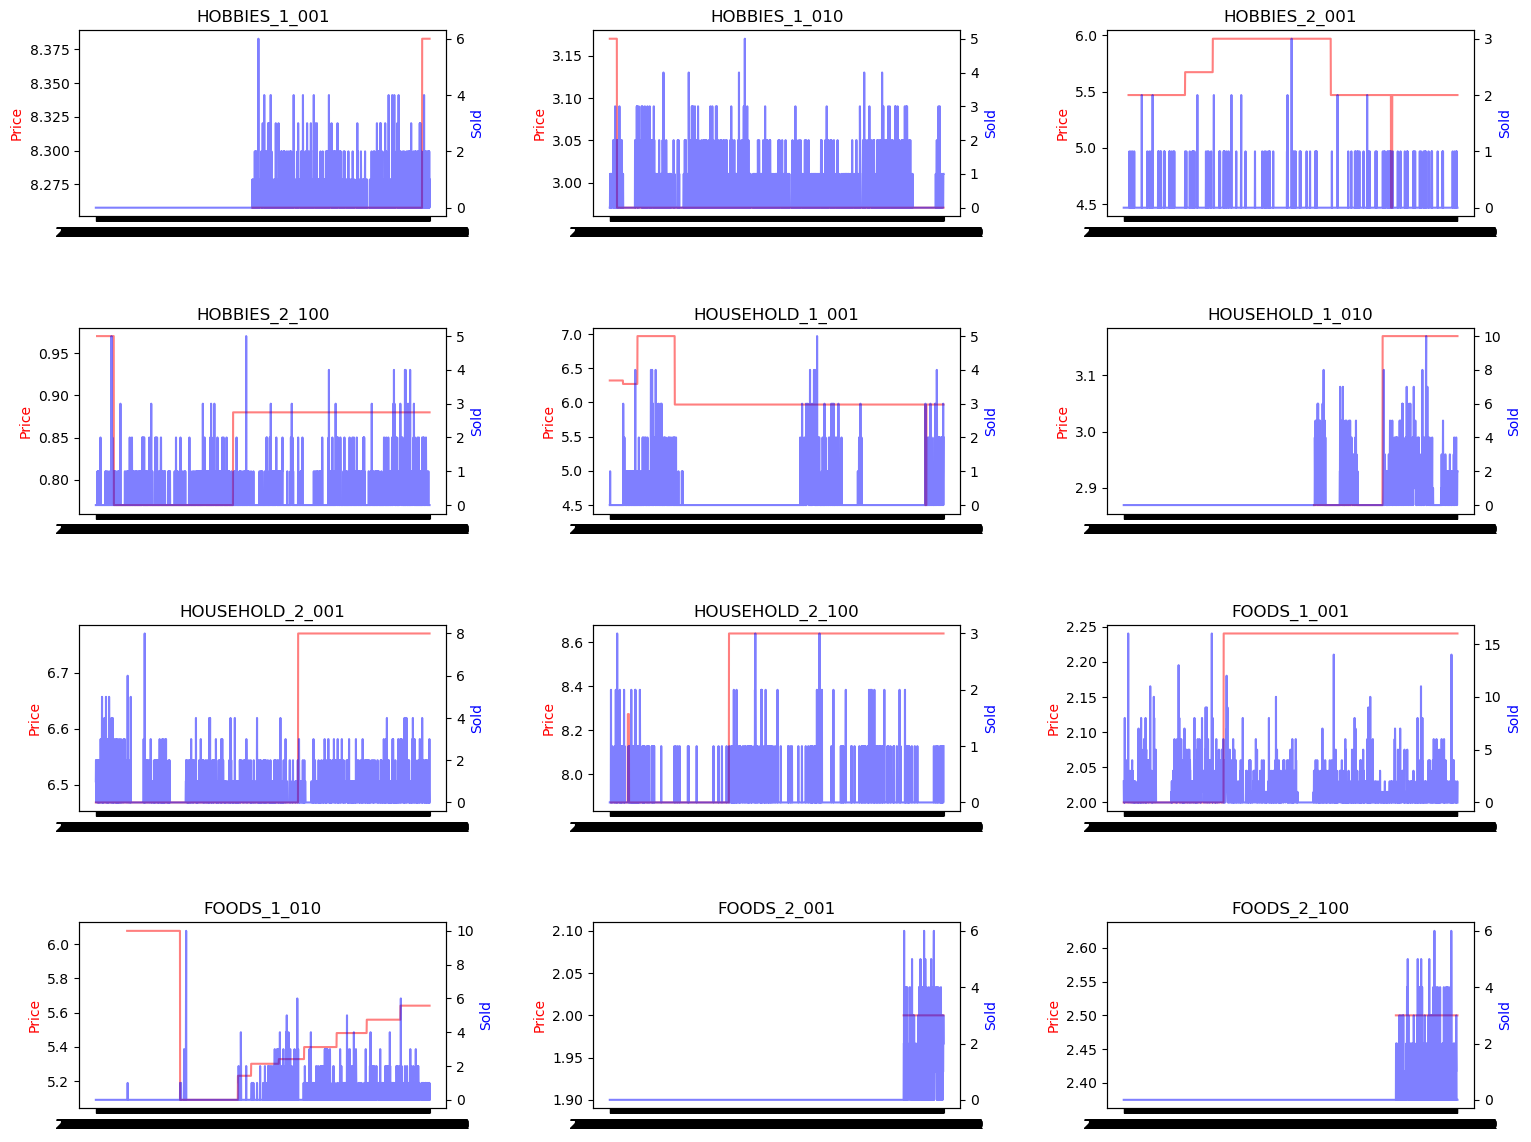

In [8]:
print('\nCA_2')

r, c = 0, 0
fig, axs = plt.subplots(4, 3, figsize=(18, 14),frameon=False)  # Adjusted figure size

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(0, 12):
    df_store = df[df['store_id'] == 'CA_2']
    item_df = df_store[df_store['item_id'] == itemID[i]]

    print(f"Plotting for item {itemID[i]}, data length: {len(item_df)}")  # Debugging print

    ax = axs[r, c]  # Accessing the current axis

    ax2 = ax.twinx()
    ax.plot(item_df['date'], item_df['sell_price'], color='r', alpha=0.5, label='Price')
    ax2.plot(item_df['date'], item_df['sold'], color='b', alpha=0.5, label='Sold')
    ax.set_title(itemID[i])

    # Adding labels to each axis for clarity
    ax.set_ylabel('Price', color='r')
    ax2.set_ylabel('Sold', color='b')

    c += 1
    if c == 3:
        c = 0
        r += 1

plt.show()


CA_3
Plotting for item HOBBIES_1_001, data length: 1941
Plotting for item HOBBIES_1_010, data length: 1941
Plotting for item HOBBIES_2_001, data length: 1941
Plotting for item HOBBIES_2_100, data length: 1941
Plotting for item HOUSEHOLD_1_001, data length: 1941
Plotting for item HOUSEHOLD_1_010, data length: 1941
Plotting for item HOUSEHOLD_2_001, data length: 1941
Plotting for item HOUSEHOLD_2_100, data length: 1941
Plotting for item FOODS_1_001, data length: 1941
Plotting for item FOODS_1_010, data length: 1941
Plotting for item FOODS_2_001, data length: 1941
Plotting for item FOODS_2_100, data length: 1941


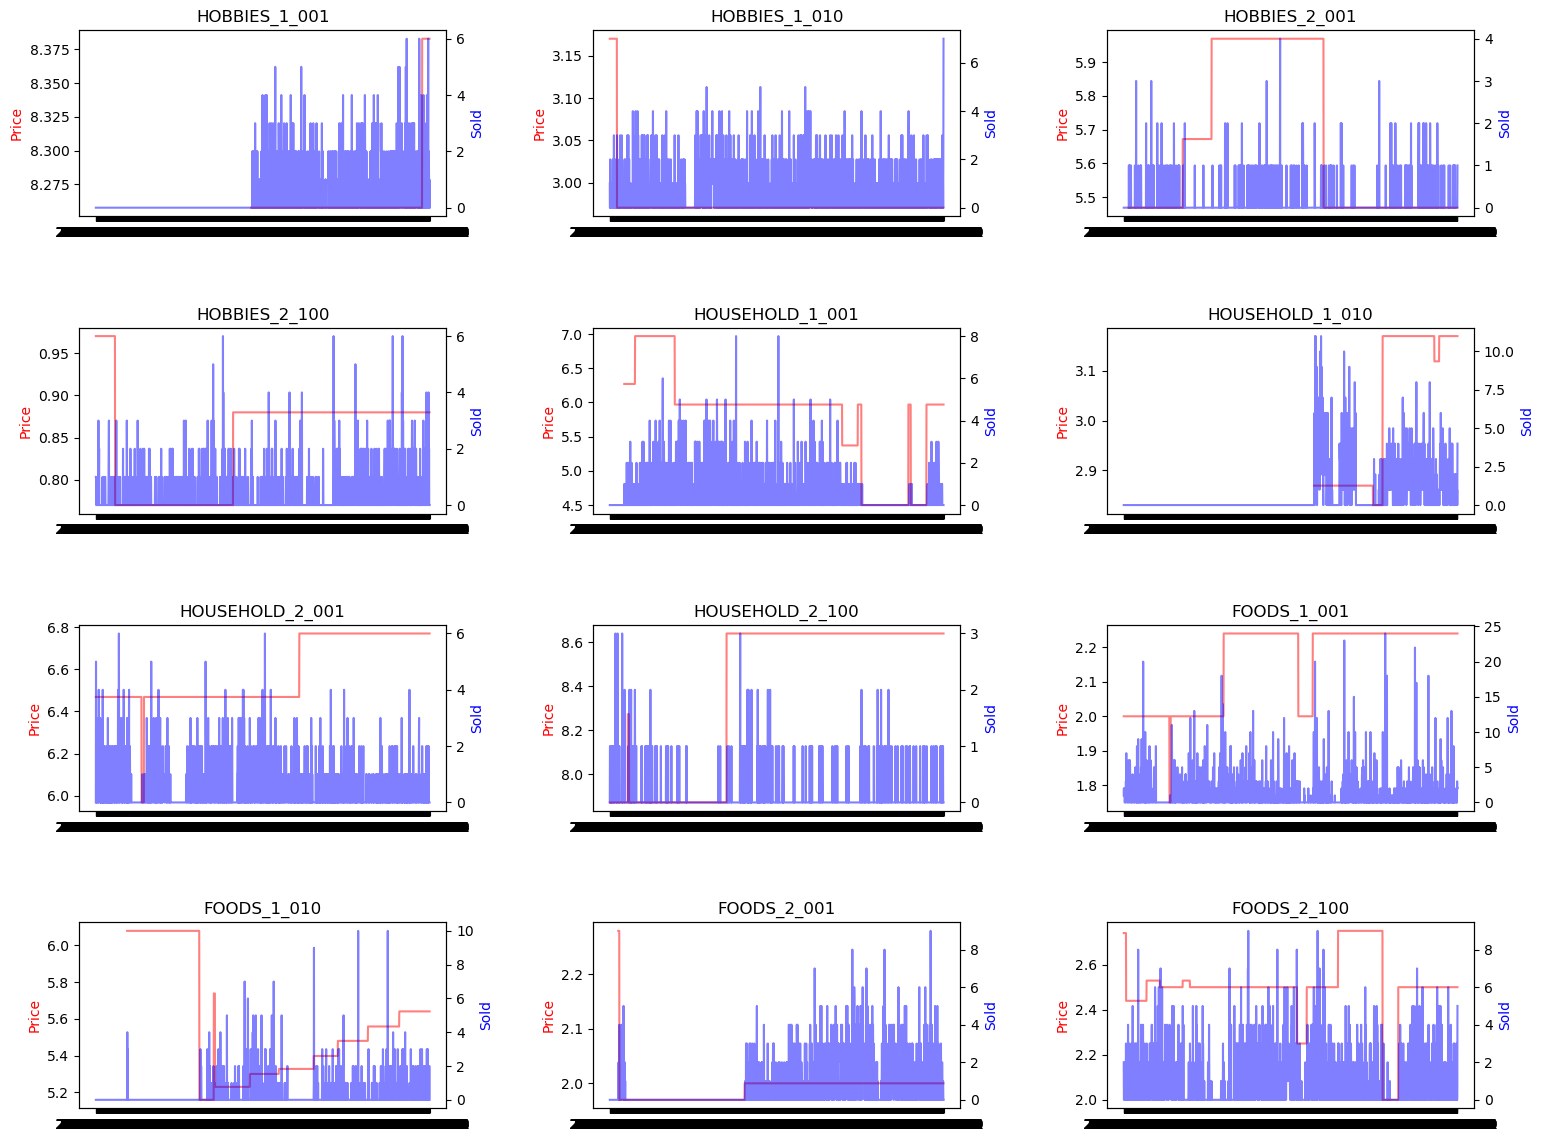

In [9]:
print('\nCA_3')

r, c = 0, 0
fig, axs = plt.subplots(4, 3, figsize=(18, 14),frameon=False)  # Adjusted figure size

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(0, 12):
    df_store = df[df['store_id'] == 'CA_3']
    item_df = df_store[df_store['item_id'] == itemID[i]]

    print(f"Plotting for item {itemID[i]}, data length: {len(item_df)}")  # Debugging print

    ax = axs[r, c]  # Accessing the current axis

    ax2 = ax.twinx()
    ax.plot(item_df['date'], item_df['sell_price'], color='r', alpha=0.5, label='Price')
    ax2.plot(item_df['date'], item_df['sold'], color='b', alpha=0.5, label='Sold')
    ax.set_title(itemID[i])

    # Adding labels to each axis for clarity
    ax.set_ylabel('Price', color='r')
    ax2.set_ylabel('Sold', color='b')

    c += 1
    if c == 3:
        c = 0
        r += 1

plt.show()


TX_1
Plotting for item HOBBIES_1_001, data length: 1941
Plotting for item HOBBIES_1_010, data length: 1941
Plotting for item HOBBIES_2_001, data length: 1941
Plotting for item HOBBIES_2_100, data length: 1941
Plotting for item HOUSEHOLD_1_001, data length: 1941
Plotting for item HOUSEHOLD_1_010, data length: 1941
Plotting for item HOUSEHOLD_2_001, data length: 1941
Plotting for item HOUSEHOLD_2_100, data length: 1941
Plotting for item FOODS_1_001, data length: 1941
Plotting for item FOODS_1_010, data length: 1941
Plotting for item FOODS_2_001, data length: 1941
Plotting for item FOODS_2_100, data length: 1941


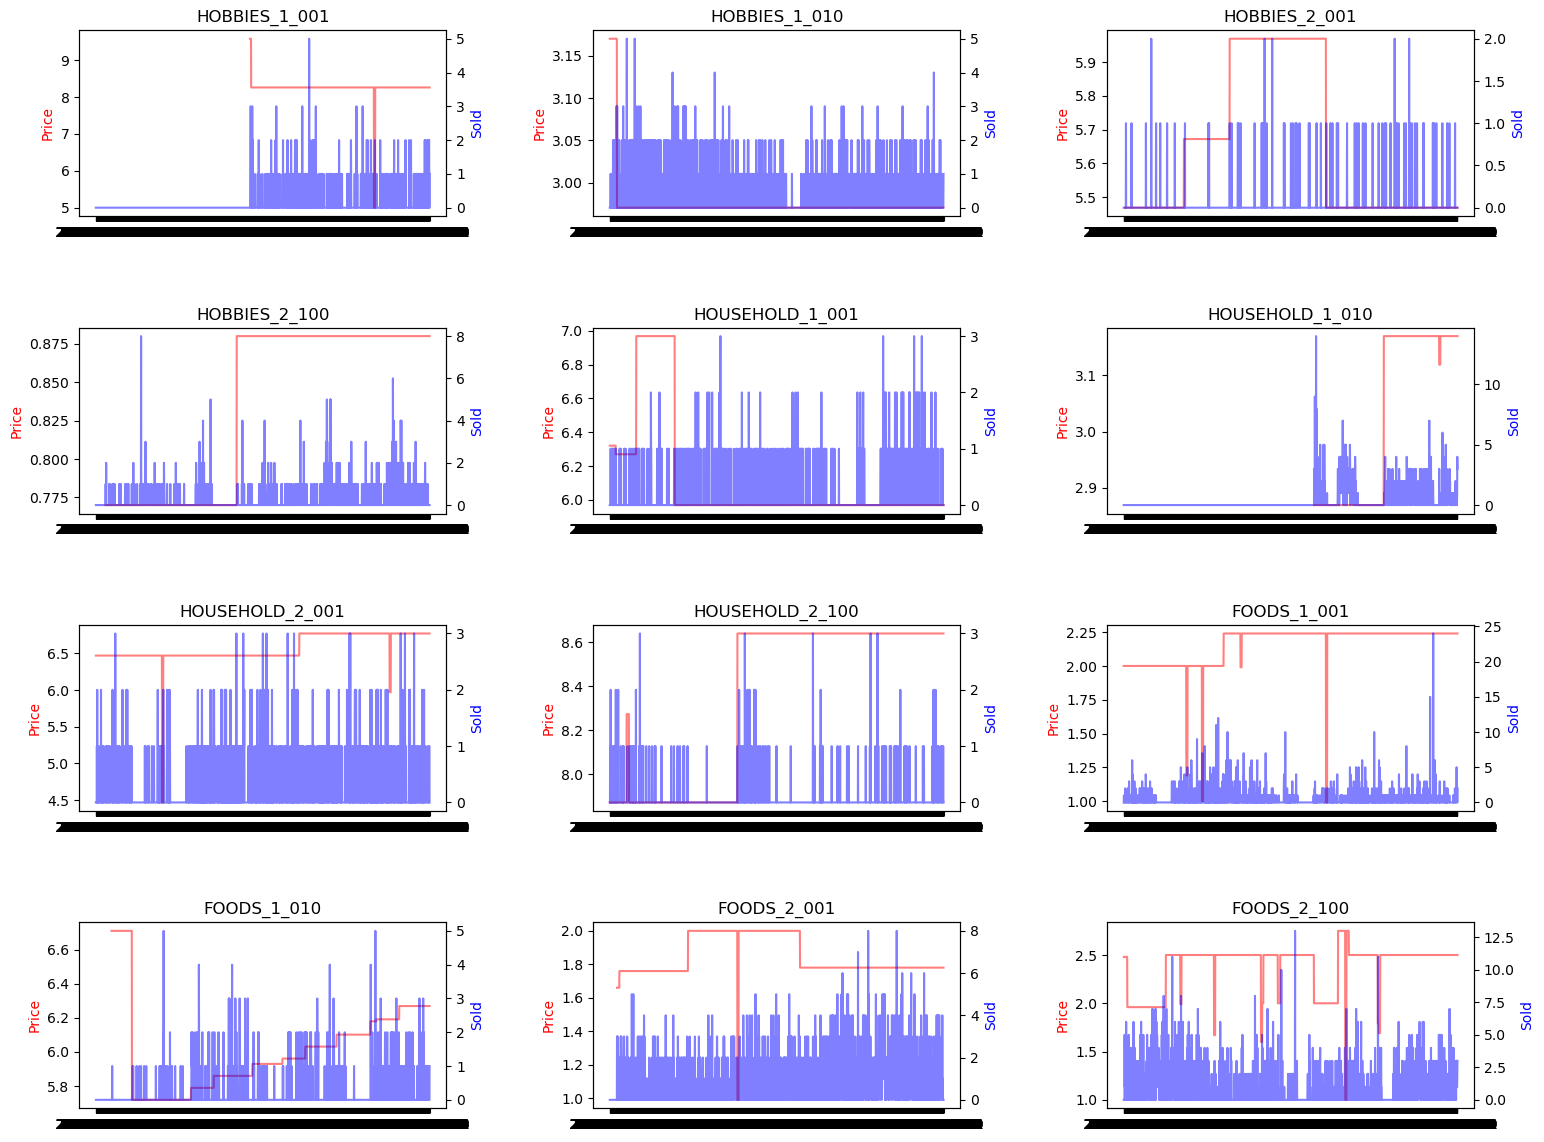

In [10]:
print('\nTX_1')

r, c = 0, 0
fig, axs = plt.subplots(4, 3, figsize=(18, 14),frameon=False)  # Adjusted figure size

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(0, 12):
    df_store = df[df['store_id'] == 'TX_1']
    item_df = df_store[df_store['item_id'] == itemID[i]]

    print(f"Plotting for item {itemID[i]}, data length: {len(item_df)}")  # Debugging print

    ax = axs[r, c]  # Accessing the current axis

    ax2 = ax.twinx()
    ax.plot(item_df['date'], item_df['sell_price'], color='r', alpha=0.5, label='Price')
    ax2.plot(item_df['date'], item_df['sold'], color='b', alpha=0.5, label='Sold')
    ax.set_title(itemID[i])

    # Adding labels to each axis for clarity
    ax.set_ylabel('Price', color='r')
    ax2.set_ylabel('Sold', color='b')

    c += 1
    if c == 3:
        c = 0
        r += 1

plt.show()


WI_1
Plotting for item HOBBIES_1_001, data length: 1941
Plotting for item HOBBIES_1_010, data length: 1941
Plotting for item HOBBIES_2_001, data length: 1941
Plotting for item HOBBIES_2_100, data length: 1941
Plotting for item HOUSEHOLD_1_001, data length: 1941
Plotting for item HOUSEHOLD_1_010, data length: 1941
Plotting for item HOUSEHOLD_2_001, data length: 1941
Plotting for item HOUSEHOLD_2_100, data length: 1941
Plotting for item FOODS_1_001, data length: 1941
Plotting for item FOODS_1_010, data length: 1941
Plotting for item FOODS_2_001, data length: 1941
Plotting for item FOODS_2_100, data length: 1941


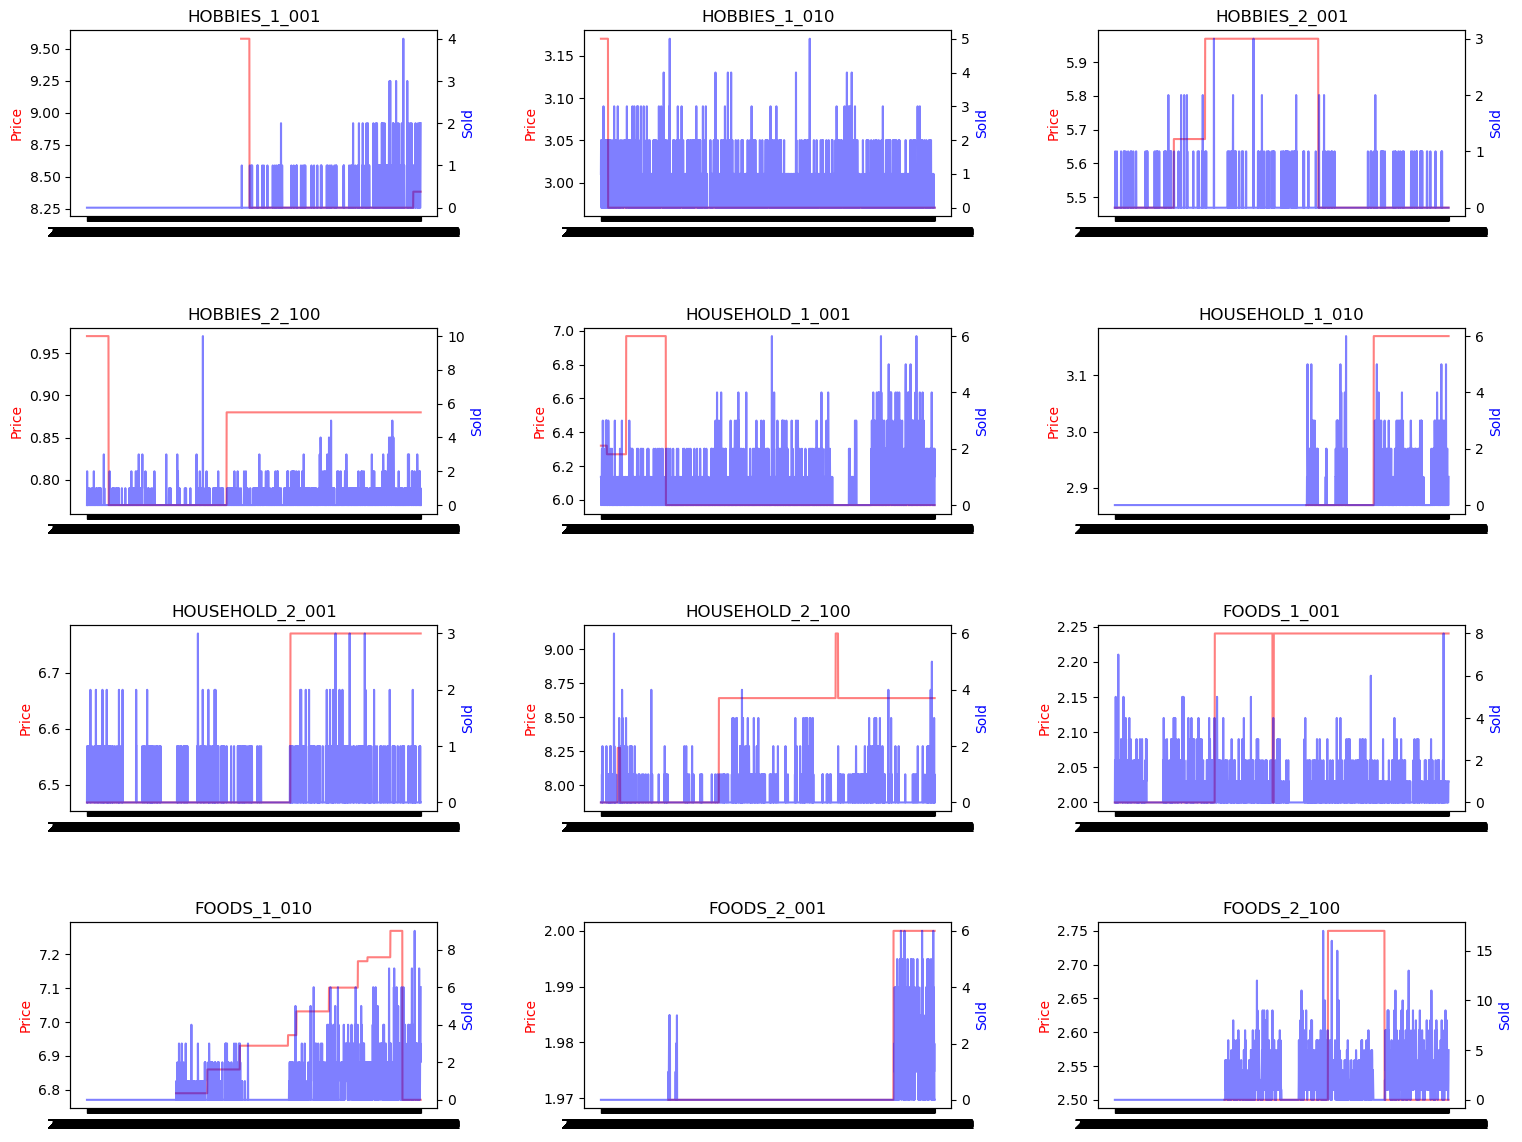

In [11]:
print('\nWI_1')

r, c = 0, 0
fig, axs = plt.subplots(4, 3, figsize=(18, 14),frameon=False)  # Adjusted figure size

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(0, 12):
    df_store = df[df['store_id'] == 'WI_1']
    item_df = df_store[df_store['item_id'] == itemID[i]]

    print(f"Plotting for item {itemID[i]}, data length: {len(item_df)}")  # Debugging print

    ax = axs[r, c]  # Accessing the current axis

    ax2 = ax.twinx()
    ax.plot(item_df['date'], item_df['sell_price'], color='r', alpha=0.5, label='Price')
    ax2.plot(item_df['date'], item_df['sold'], color='b', alpha=0.5, label='Sold')
    ax.set_title(itemID[i])

    # Adding labels to each axis for clarity
    ax.set_ylabel('Price', color='r')
    ax2.set_ylabel('Sold', color='b')

    c += 1
    if c == 3:
        c = 0
        r += 1

plt.show()

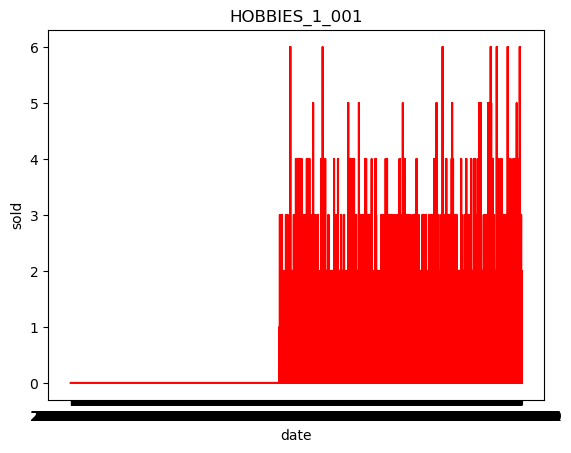

In [16]:
#About Sold
df_1 = df[df['item_id']=='HOBBIES_1_001']
plt.plot(df_1['date'], df_1['sold'], color='red')  # Change 'red' to your desired color
plt.title('HOBBIES_1_001')
plt.xlabel('date')
plt.ylabel('sold')
#plt.savefig('HOBBIES_1_001_sold_.png')
plt.show()

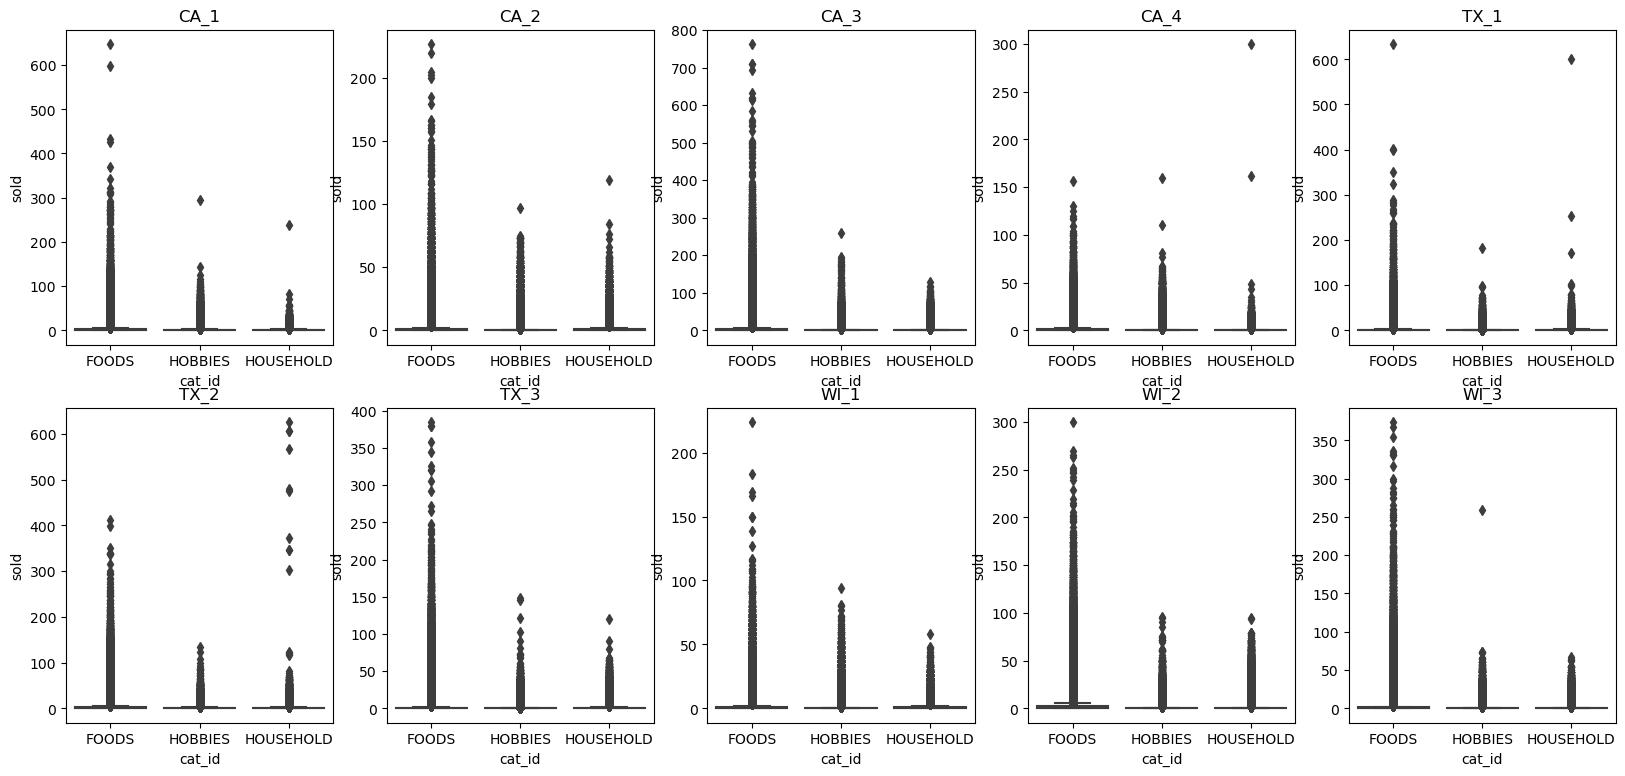

In [19]:
# Check Sold Distribution
state_id_lst = df['state_id'].unique()
store_id_lst = df['store_id'].unique()
category = df['cat_id'].unique()

fig, ax = plt.subplots(2,5,figsize=(20, 9))
r,c=0,0
for store_id in store_id_lst:
    df_store = df[df['store_id']==store_id]
    sns.boxplot(x='cat_id',y='sold',data=df_store,ax=ax[r][c])
    ax[r][c].set_title(store_id)
    c +=1
    if c==5:
        r+=1
        c=0
#plt.savefig('Dist_sold.png')
plt.show()

# Many products have a sell rate of 0, and it is assumed that some products will probably sell in large numbers.
# FOODS has the largest number of sales, while HOUSEHOLD and HOBBIES tend to have fewer sales.

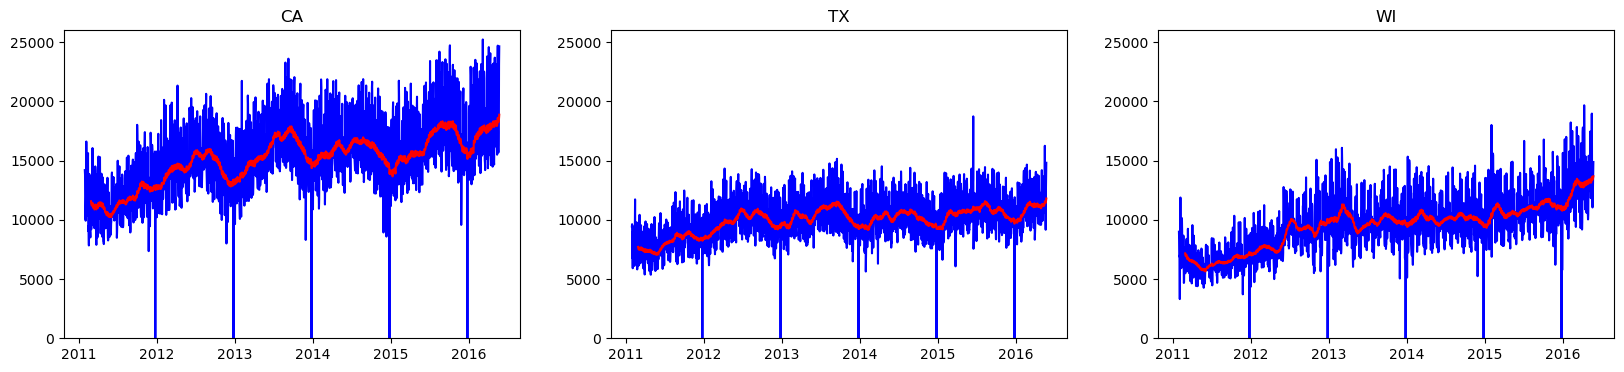

In [26]:
# Visualize trends in sales volume (total) of all products in each state
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
for i, state_id in enumerate(state_id_lst):
    df_state = df[df['state_id'] == state_id]
    df_state.set_index('date', inplace=True)
    df_state.index = pd.to_datetime(df_state.index)
    sold = df_state.groupby(df_state.index).sum(numeric_only=True)['sold']  # Added numeric_only=True
    sold_rol = sold.rolling(window=30).mean()
    ax[i].plot(sold, c='b')
    ax[i].plot(sold_rol, c='r')
    ax[i].set_ylim(0, 26000)
    ax[i].set_title(state_id)
#plt.savefig('Each_state_all_goods_sold.png')
plt.show()

C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['date'] = pd.to_datetime(df_state['date'])
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sc = df_state_cat.groupby('date').sum()
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric

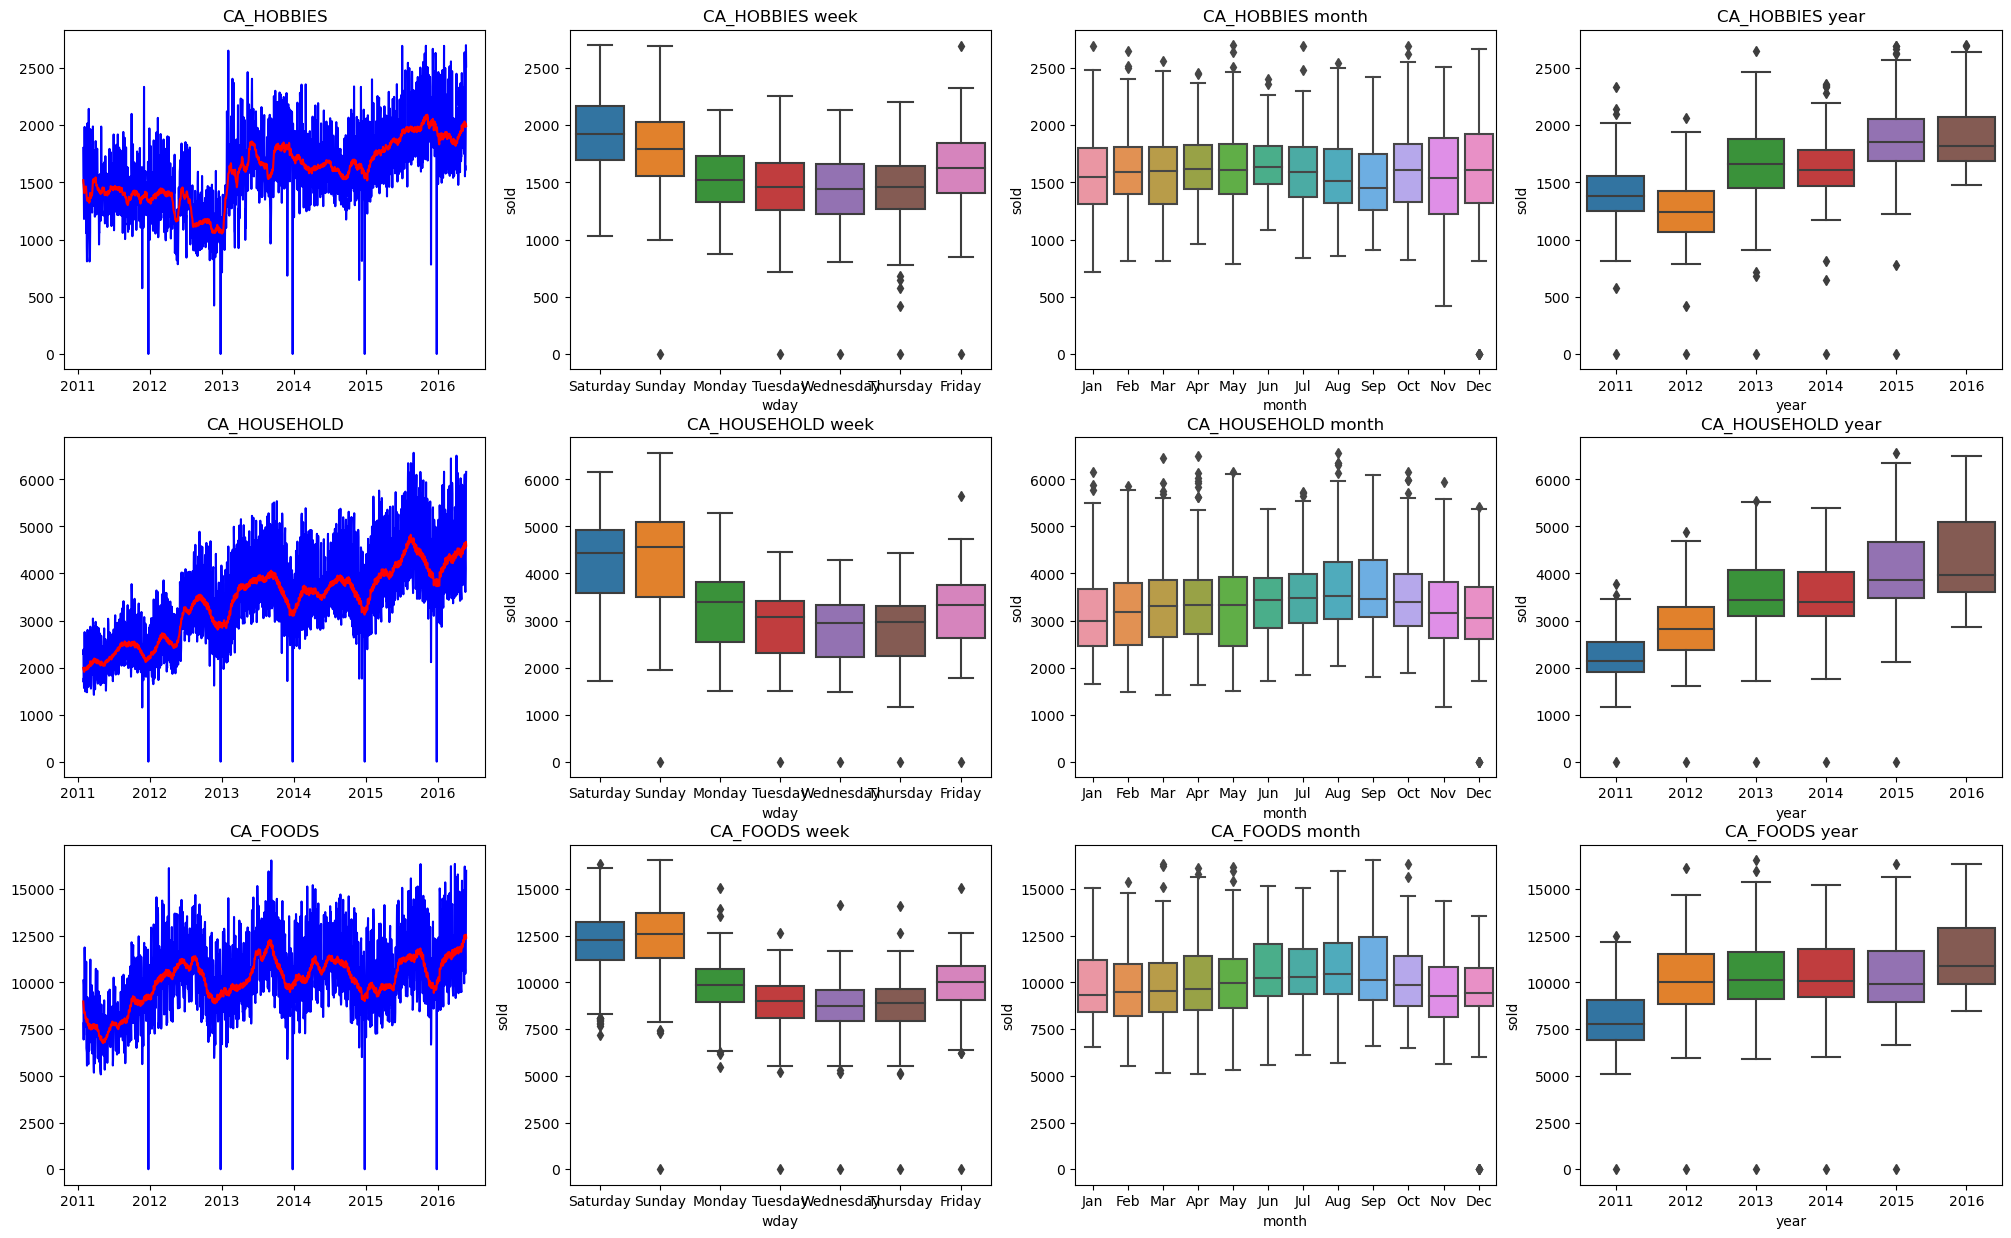

C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['date'] = pd.to_datetime(df_state['date'])
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sc = df_state_cat.groupby('date').sum()
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric

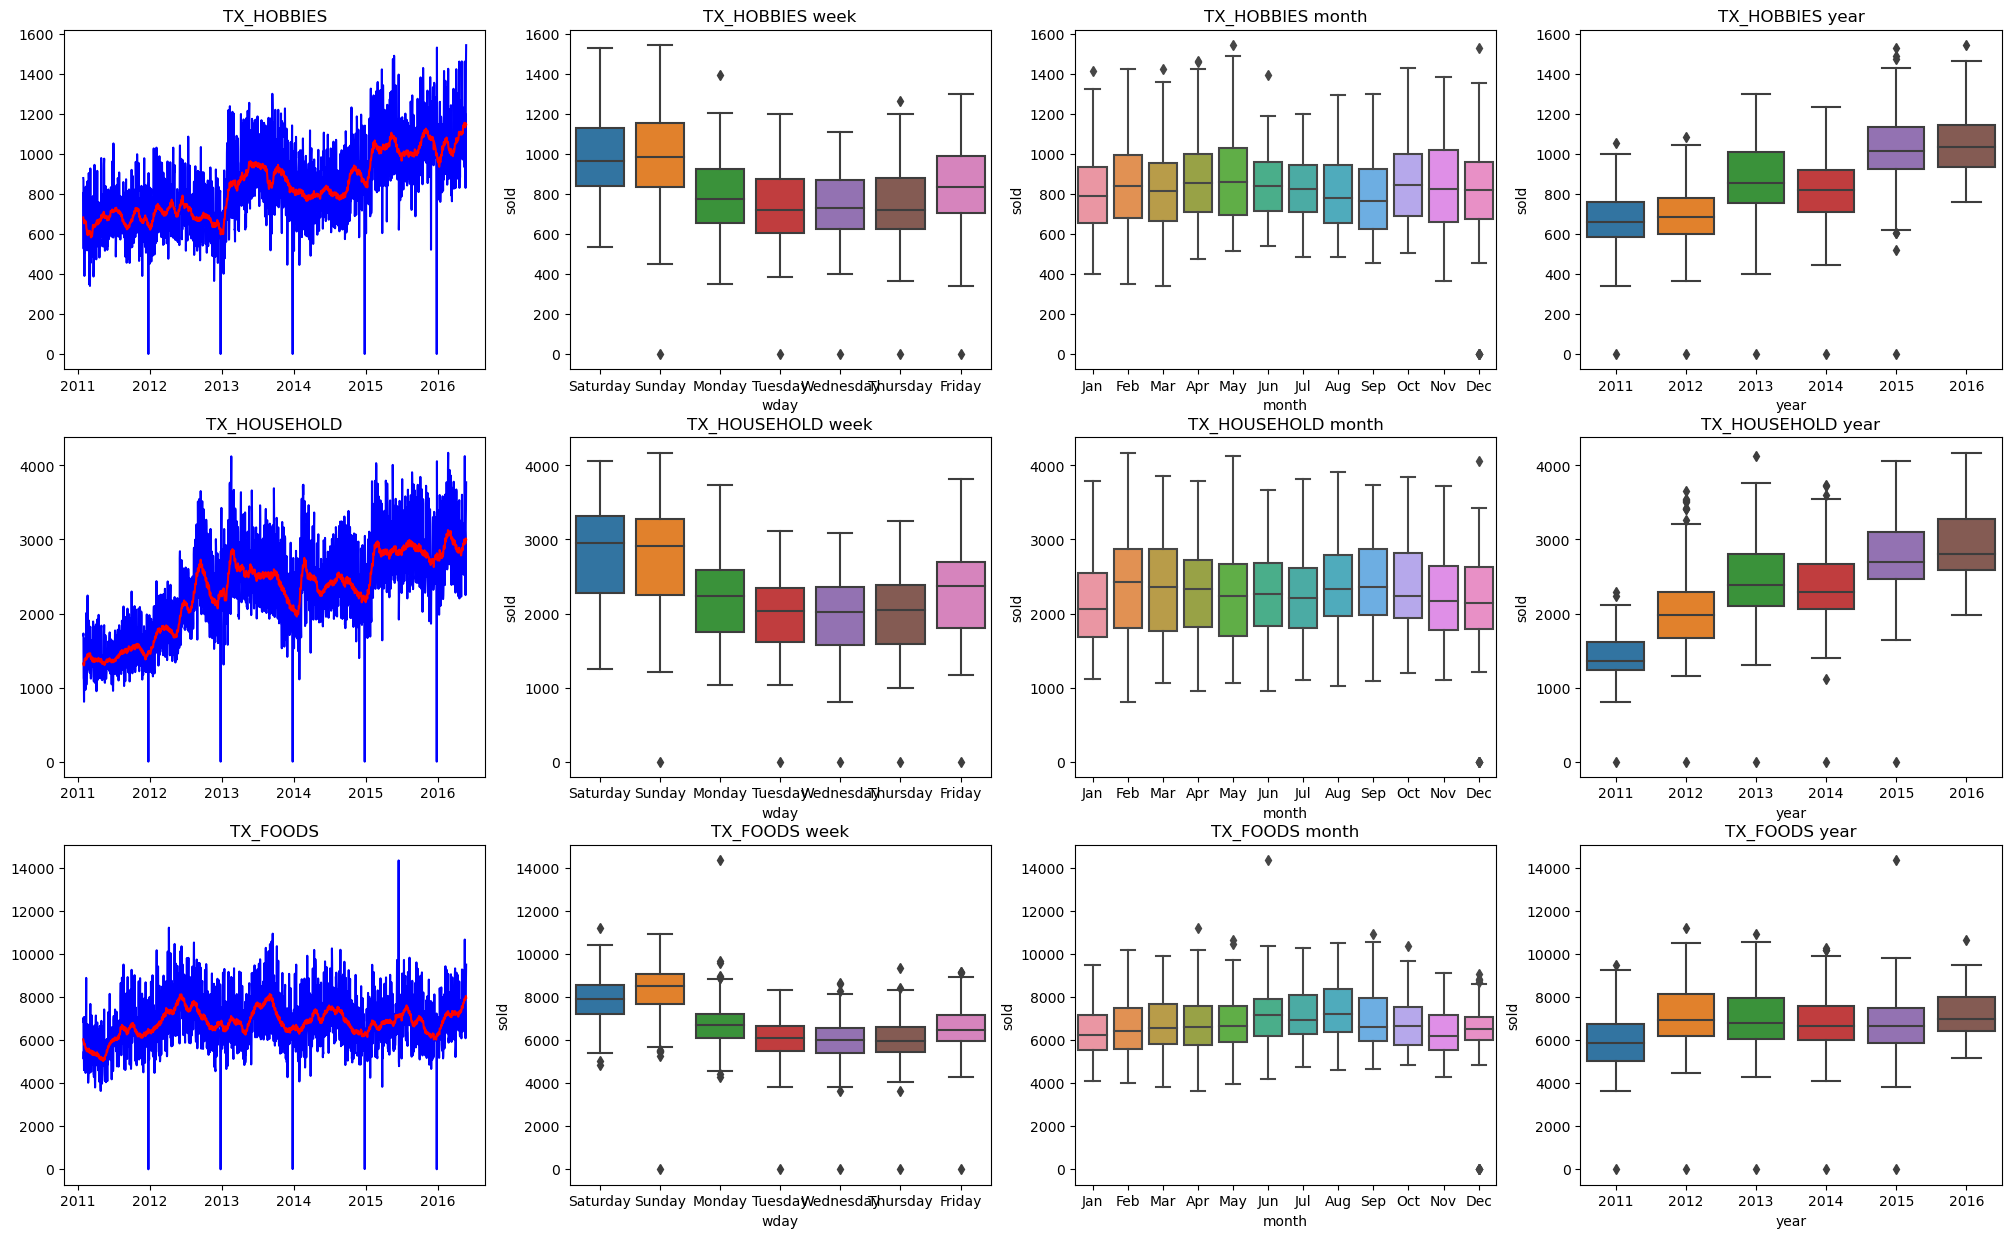

C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['date'] = pd.to_datetime(df_state['date'])
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sc = df_state_cat.groupby('date').sum()
C:\Users\Jensen R\AppData\Local\Temp\ipykernel_16120\4021921831.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric

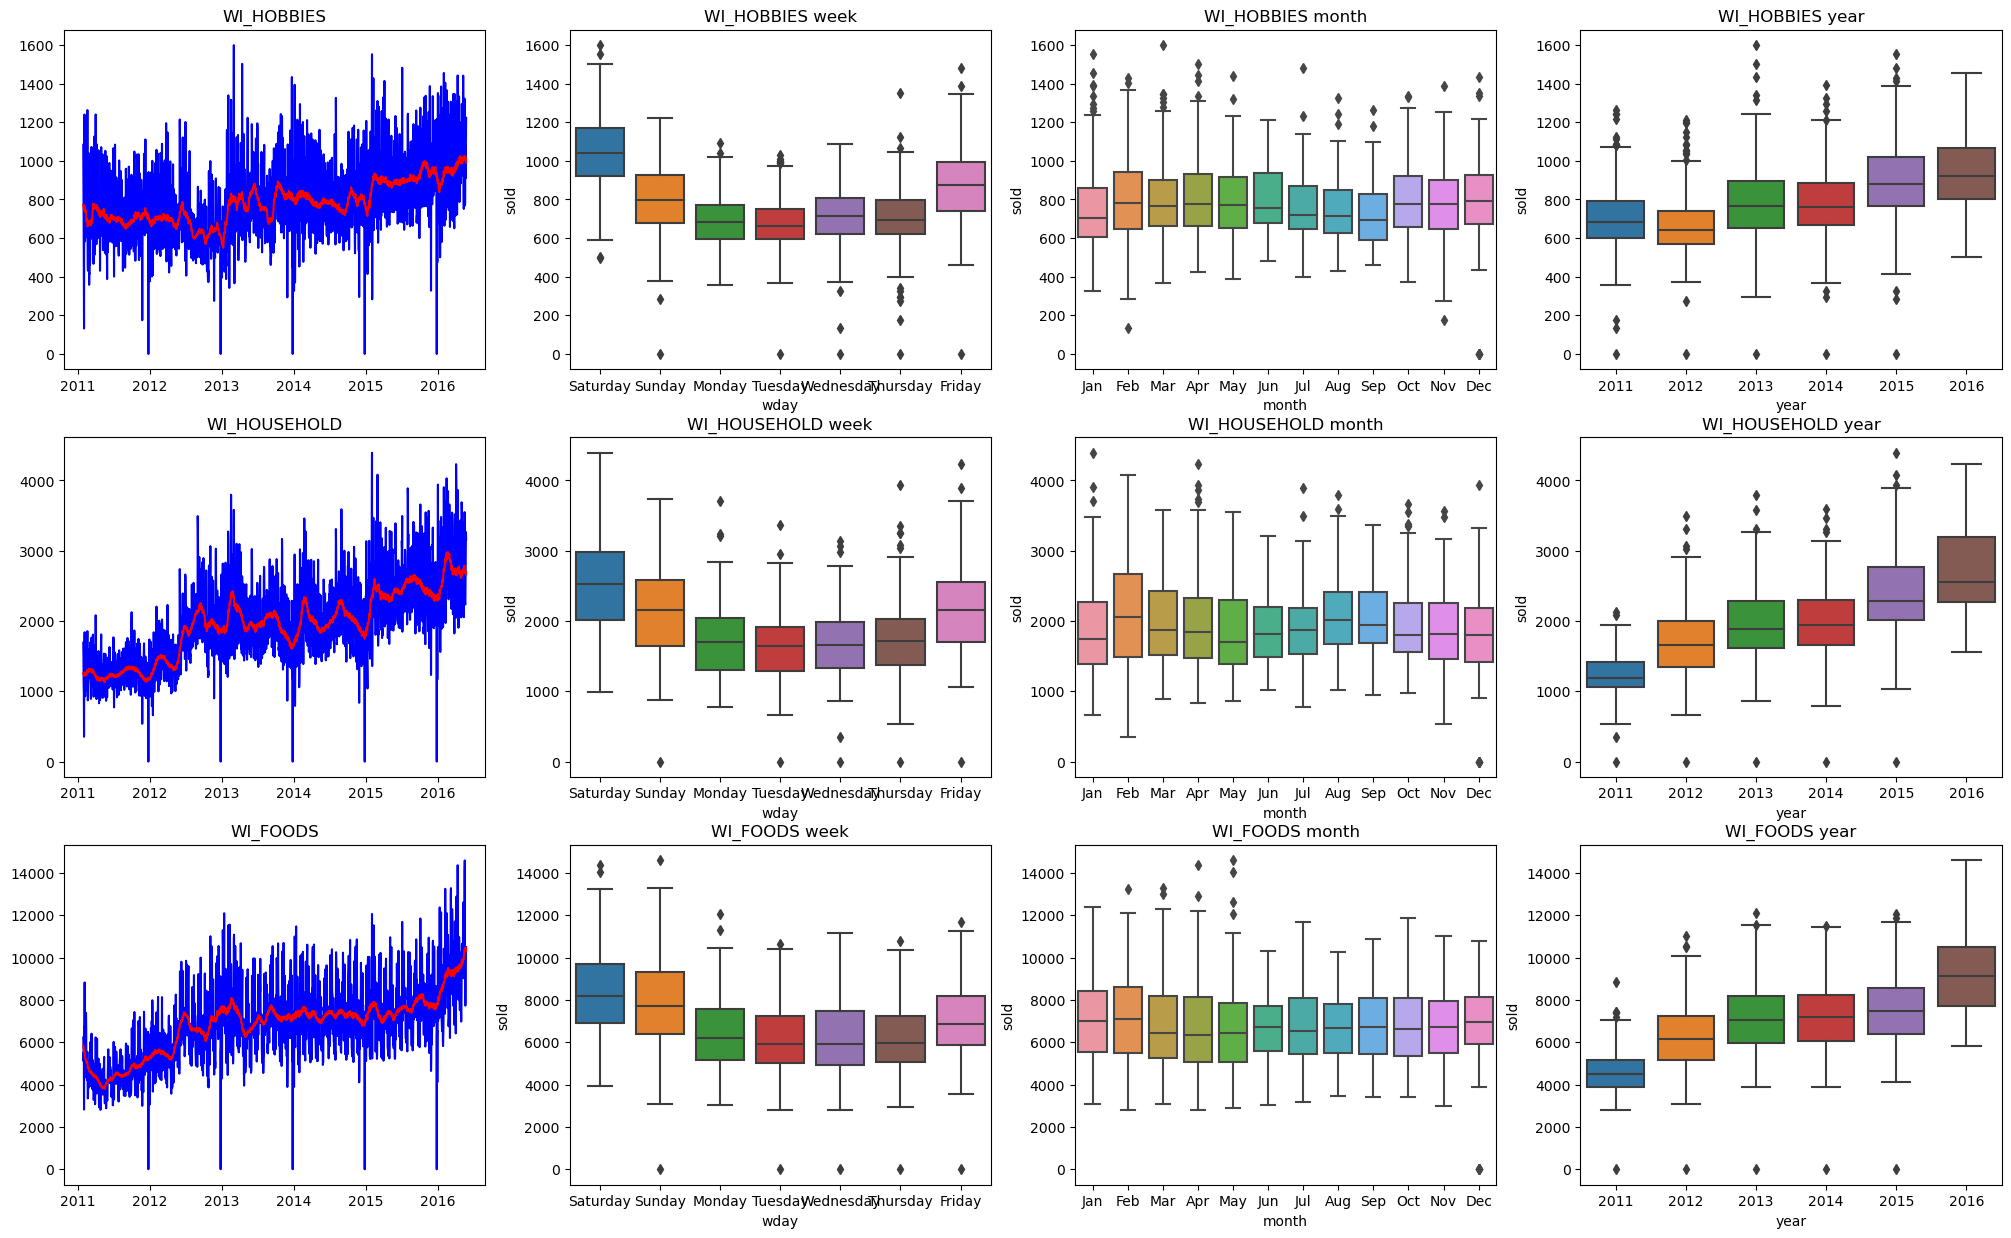

In [39]:
# Visualize trends in the number of products sold (total) for each category at each store
# Visualize data distribution with boxplots
for state_id in state_id_lst:
    fig, ax = plt.subplots(3, 4, figsize=(25, 15))
    df_state = df[df['state_id'] == state_id]
    df_state['date'] = pd.to_datetime(df_state['date'])
    df_state.set_index('date', inplace=True)
    
    for i, cat_id in enumerate(category):
        df_state_cat = df_state[df_state['cat_id'] == cat_id]
        df_sc = df_state_cat.groupby('date').sum()
        sold_rol = df_sc['sold'].rolling(window='30D', center=True).mean()  # Use '30D' with datetime index

        ax[i][0].plot(df_sc['sold'], c='b')  # Raw data: Blue
        ax[i][0].plot(sold_rol, c='r')  # Moving average: Red
        ax[i][0].set_title(state_id + '_' + cat_id)
        
        sns.boxplot(x='wday', y='sold', data=df_sc, ax=ax[i][1])
        ax[i][1].set_title(state_id + '_' + cat_id + ' week')
        ax[i][1].set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

        sns.boxplot(x='month', y='sold', data=df_sc, ax=ax[i][2])
        ax[i][2].set_title(state_id + '_' + cat_id + ' month')
        ax[i][2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        sns.boxplot(x='year', y='sold', data=df_sc, ax=ax[i][3])
        ax[i][3].set_title(state_id + '_' + cat_id + ' year')
        ax[i][3].set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016'])

    plt.show()
    
# Considerations about sold from visualization results
# The number of products sold overall, by state, by store, and by product category is all on the rise.
# An increase is confirmed year by year.
# Sales trends vary by state, even if the state is the same, the trends in total sales vary depending on the store.
# The number of units sold differs depending on the day of the week in each state and product category.
# It is high on Saturday and Sunday, decreases until Wednesday, and tends to increase from Thursday (periodicity within the week)
# In terms of product categories, Saturday > Sunday for HOBBISE, and Sunday > Saturday for HOUSEHOLD and FOODS.
# Therefore, we believe that day of the week and year information is particularly effective for regression.